## Project 2 - Regression Challenge

### Predict the price of homes at sale for the Aimes Iowa Housing dataset

#### Data Exploration and Manipulation

In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
df_original = pd.read_csv('./Data/train (2).csv')
df_ktest_original = pd.read_csv('./Data/test (2).csv')


In [4]:
df = df_original.drop(['Id', 'PID'], axis=1)
df_ktest = df_ktest_original.drop(['Id', 'PID'], axis=1)

In [5]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
df_ktest.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [7]:
df.shape

(2051, 79)

In [8]:
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     1721 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            140 non-null    object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [10]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Mas Vnr Type    1240
                ... 
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 79, dtype: int64

In [11]:
# replace spaces in column names and convert all columns to lowercase:
df.columns = [x.lower().replace(' ','_') for x in df.columns]

In [12]:
df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [13]:
df_object = df.select_dtypes(include=['object'])

In [14]:
df_numbers = df.select_dtypes(exclude=['object'])

In [15]:
df_object.head()

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,...,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD


In [16]:
df_numbers.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [17]:
# counts the number of True values (which represent missing values), 
# sorts the values and returns ttop 15 columns with the highest number of missing values.
df_numbers.isnull().sum().sort_values(ascending=False)[:15]

lot_frontage      330
garage_yr_blt     114
mas_vnr_area       22
bsmt_half_bath      2
bsmt_full_bath      2
bsmtfin_sf_2        1
garage_cars         1
garage_area         1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmtfin_sf_1        1
fireplaces          0
3ssn_porch          0
enclosed_porch      0
open_porch_sf       0
dtype: int64

In [18]:
#filling nans with 0 - This decision is an educative guess, which will vary depending on the type of data you are working with
df_numbers['lot_frontage'].fillna((0.0), inplace=True)
df_numbers['garage_yr_blt'].fillna((0.0), inplace=True)
df_numbers['mas_vnr_area'].fillna((0.0), inplace=True)
df_numbers['bsmt_half_bath'].fillna((0.0), inplace=True)
df_numbers['bsmt_full_bath'].fillna((0.0), inplace=True)
df_numbers['garage_cars'].fillna((0.0), inplace=True)
df_numbers['bsmtfin_sf_1'].fillna((0.0), inplace=True)
df_numbers['bsmtfin_sf_2'].fillna((0.0), inplace=True)
df_numbers['bsmt_unf_sf'].fillna((0.0), inplace=True)
df_numbers['total_bsmt_sf'].fillna((0.0), inplace=True)
df_numbers['garage_area'].fillna((0.0), inplace=True)

In [19]:
df_numbers.isnull().sum().sort_values(ascending=False)[:15]

ms_subclass       0
half_bath         0
kitchen_abvgr     0
totrms_abvgrd     0
fireplaces        0
garage_yr_blt     0
garage_cars       0
garage_area       0
wood_deck_sf      0
open_porch_sf     0
enclosed_porch    0
3ssn_porch        0
screen_porch      0
pool_area         0
misc_val          0
dtype: int64

In [20]:
df_numbers.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [21]:
# list comprehension
features_list = [each for each in df_numbers.columns if each != 'saleprice']

In [57]:
X = df_numbers[features_list] # features
y = df_numbers['saleprice']  # target

In [23]:
X.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,475.0,0,44,0,0,0,0,0,3,2010
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,559.0,0,74,0,0,0,0,0,4,2009
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,246.0,0,52,0,0,0,0,0,1,2010
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,400.0,100,0,0,0,0,0,0,4,2010
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,484.0,0,59,0,0,0,0,0,3,2010


In [24]:
X.shape

(2051, 36)

In [25]:
#y

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
df_numbers_corr = list(pd.concat([X_train, y_train],
                          axis=1).corr()['saleprice'].sort_values(ascending=False).index[1:38])

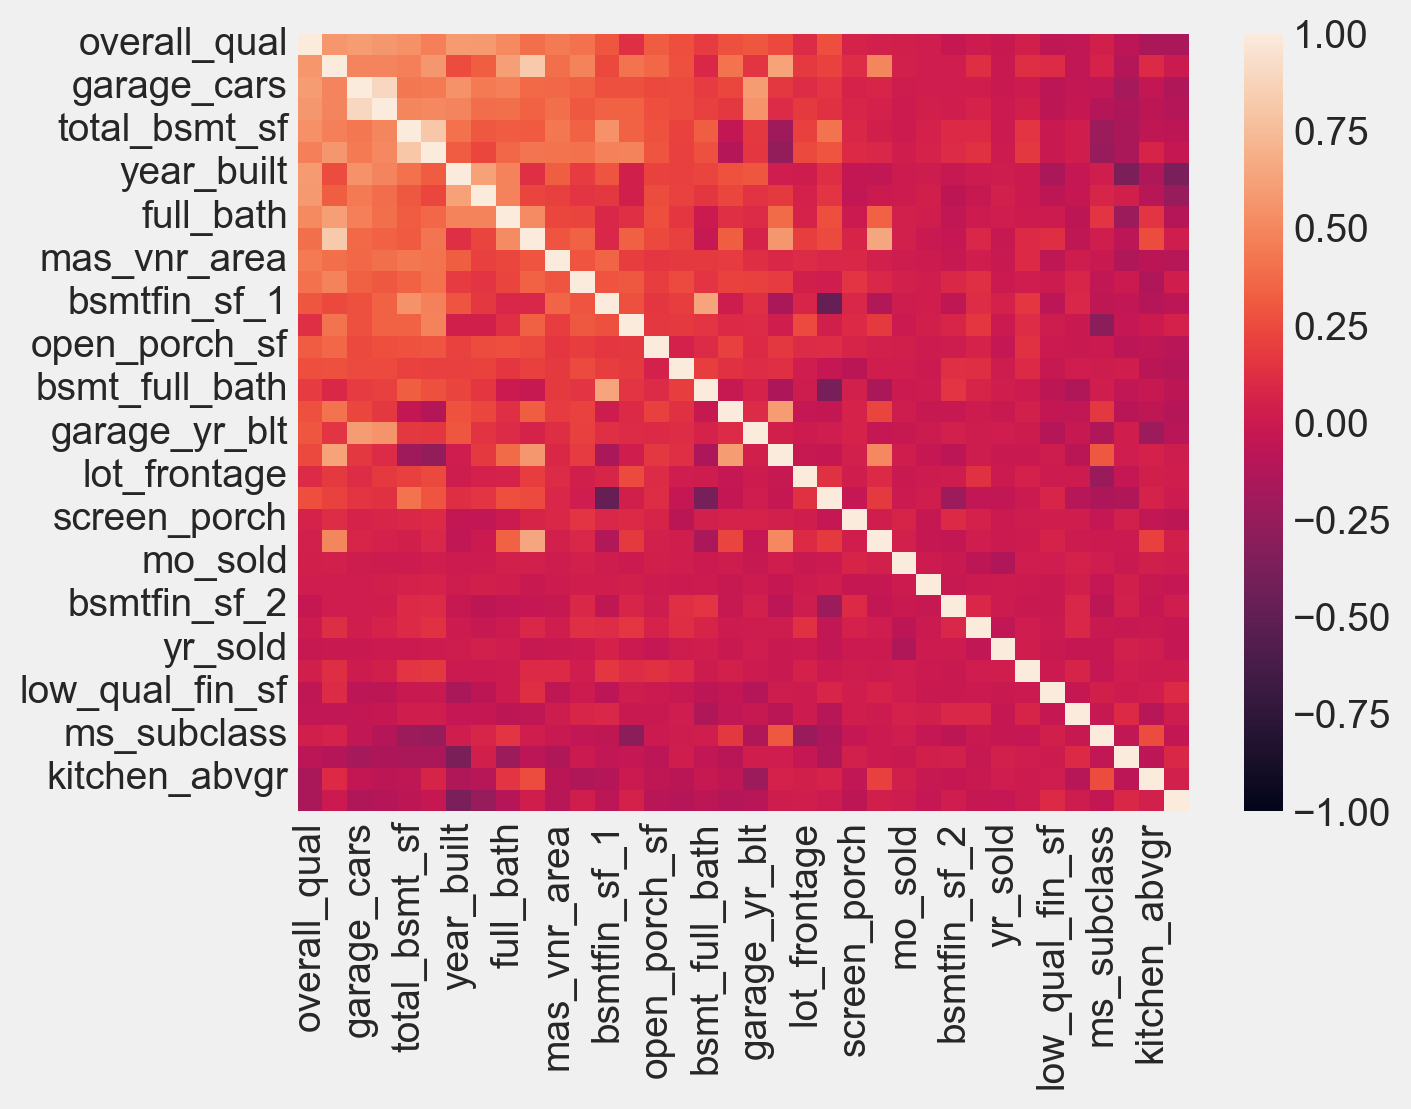

In [28]:
sns.heatmap(X_train[df_numbers_corr].corr(), vmin=-1, vmax=1);

In [29]:
X_train = X_train[df_numbers_corr]
X_test = X_test[df_numbers_corr]

#### Data Preprocessing 

**Preprocessing** in machine learning refers to the crucial initial phase of transforming raw data into a clean, structured, and suitable format for training and evaluating machine learning models. This process is essential because real-world data is often incomplete, inconsistent, noisy, or in a format incompatible with machine learning algorithms.


**PolynomialFeatures()** is a preprocessing tool within scikit-learn's preprocessing module in machine learning. It is used to generate polynomial and interaction features from existing features in a dataset. It's primary purpose is to allow linear models (like Linear Regression) to capture non-linear relationships in the data.


**StandardScaler()** in machine learning, particularly within the scikit-learn library, is a preprocessing technique used to standardize features by removing the mean and scaling to unit variance. This transformation results in a distribution with a mean of 0 and a standard deviation of 1. Many machine learning algorithms, especially those based on distance calculations (e.g., K-Nearest Neighbors, Support Vector Machines) or gradient descent (e.g., neural networks), are sensitive to the scale of features. StandardScaler ensures that all features contribute equally to the model, preventing features with larger numerical ranges from dominating those with smaller ranges.

In machine learning, **LogisticRegression()** typically often found within libraries like scikit-learn in Python. It is a supervised learning algorithm primarily used for binary classification tasks, although extensions exist for multi-class classification (Multinomial and Ordinal Logistic Regression). It models the probability of a binary outcome (e.g., spam/not spam, disease/no disease) based on a set of input features.


A machine learning (ML) **pipeline** is a structured means of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs.

**Lasso** (Least Absolute Shrinkage and Selection Operator) is a regularization technique in machine learning, particularly useful for linear regression models. It performs both feature selection and regularization, helping to prevent overfitting and improve model interpretability. Lasso achieves this by adding a penalty term to the model's loss function, which shrinks some coefficients towards zero, effectively removing some features from the model. 

In [30]:
pipe = Pipeline([
     ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lr', LinearRegression()),
])

In [31]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pf', PolynomialFeatures()), ('ss', StandardScaler()),
                ('lr', LinearRegression())])

In [32]:
# linear regression model using only num variables and replacing nulls with mean of each variables
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
# 0.966166614677402
# -2.8546655569926435e+19

0.9640418224152991
-1.9714412427583793e+20


In [33]:
# linear regression model using only num variables and replacing nulls with 0 for each variables
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
# 0.933090622538089
# -3.536508142059942e+22

0.9640418224152991
-1.9714412427583793e+20


In [34]:
X_train.shape

(1538, 36)

In [35]:
# LassoCv model using only num variables and replacing nulls with 0 for each variables
pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lcv', LassoCV(n_alphas=500, max_iter=1000))
])

pipe.fit(X_train, y_train)

print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))


0.91188628845127
0.9081957725733374


In [36]:
pipe.named_steps['lcv'].alpha_

1239.4303272508876

In [37]:
list(zip(pipe.named_steps['lcv'].coef_, X_train.columns))

[(0.0, 'overall_qual'),
 (0.0, 'gr_liv_area'),
 (0.0, 'garage_cars'),
 (0.0, 'garage_area'),
 (0.0, 'total_bsmt_sf'),
 (0.0, '1st_flr_sf'),
 (0.0, 'year_built'),
 (0.0, 'year_remod/add'),
 (0.0, 'full_bath'),
 (0.0, 'totrms_abvgrd'),
 (0.0, 'mas_vnr_area'),
 (0.0, 'fireplaces'),
 (0.0, 'bsmtfin_sf_1'),
 (0.0, 'lot_area'),
 (0.0, 'open_porch_sf'),
 (0.0, 'wood_deck_sf'),
 (0.0, 'bsmt_full_bath'),
 (0.0, 'half_bath'),
 (-0.0, 'garage_yr_blt'),
 (-0.0, '2nd_flr_sf'),
 (0.0, 'lot_frontage'),
 (0.0, 'bsmt_unf_sf'),
 (-0.0, 'screen_porch'),
 (0.0, 'bedroom_abvgr'),
 (-0.0, 'mo_sold'),
 (0.0, '3ssn_porch'),
 (0.0, 'bsmtfin_sf_2'),
 (0.0, 'pool_area'),
 (0.0, 'yr_sold'),
 (-0.0, 'misc_val'),
 (-0.0, 'low_qual_fin_sf'),
 (-0.0, 'bsmt_half_bath'),
 (0.0, 'ms_subclass'),
 (-0.0, 'overall_cond'),
 (0.0, 'kitchen_abvgr'),
 (-0.0, 'enclosed_porch')]

In [38]:
pd.DataFrame({
    'coefs': pipe.named_steps['pf'].get_feature_names_out(X_train.columns),
    'vals': pipe.named_steps['lcv'].coef_
}).set_index('coefs').sort_values('vals', ascending=False)

,vals
coefs,
overall_qual gr_liv_area,28329.878973
overall_qual total_bsmt_sf,14065.082650
year_built year_remod/add,12247.745635
overall_qual bsmtfin_sf_1,9289.937226
overall_qual garage_area,5335.271285
...,...
bedroom_abvgr kitchen_abvgr,-1193.584548
bsmtfin_sf_1 pool_area,-3821.518206
misc_val bsmt_half_bath,-4832.603498


In [39]:
df_ktest.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [40]:
# replace spaces in column names and convert all columns to lowercase:
df_ktest.columns = [x.lower().replace(' ','_') for x in df_ktest.columns]

In [41]:
df_ktest.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [42]:
df_ktest_numbers = df_ktest.select_dtypes(exclude=['object'])

In [43]:
df_ktest_numbers.shape

(879, 36)

In [44]:
df_ktest_numbers.isnull().sum().sort_values(ascending=False)[:15]

lot_frontage      160
garage_yr_blt      45
mas_vnr_area        1
wood_deck_sf        0
bedroom_abvgr       0
kitchen_abvgr       0
totrms_abvgrd       0
fireplaces          0
garage_cars         0
garage_area         0
ms_subclass         0
half_bath           0
enclosed_porch      0
3ssn_porch          0
screen_porch        0
dtype: int64

In [45]:
df_ktest_numbers['lot_frontage'].fillna((0.0), inplace=True)
df_ktest_numbers['garage_yr_blt'].fillna((0.0), inplace=True)
df_ktest_numbers['mas_vnr_area'].fillna((0.0), inplace=True)


In [46]:
df_ktest_numbers.isnull().sum().sort_values(ascending=False)[:15]

ms_subclass       0
lot_frontage      0
bedroom_abvgr     0
kitchen_abvgr     0
totrms_abvgrd     0
fireplaces        0
garage_yr_blt     0
garage_cars       0
garage_area       0
wood_deck_sf      0
open_porch_sf     0
enclosed_porch    0
3ssn_porch        0
screen_porch      0
pool_area         0
dtype: int64

In [47]:
X_train.shape

(1538, 36)

In [48]:
df_ktest_numbers.shape

(879, 36)

In [49]:
# probably need to drop 'id' from both

In [50]:
X_train[sorted(X_train.columns)].head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,bedroom_abvgr,bsmt_full_bath,bsmt_half_bath,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,enclosed_porch,...,overall_cond,overall_qual,pool_area,screen_porch,total_bsmt_sf,totrms_abvgrd,wood_deck_sf,year_built,year_remod/add,yr_sold
532,1587,0,0,3,0.0,0.0,749.0,838.0,0.0,0,...,6,6,0,0,1587.0,7,0,1971,1971,2007
415,1262,1005,0,3,1.0,0.0,717.0,288.0,0.0,0,...,8,7,0,0,1005.0,7,521,1937,1980,2007
273,864,0,0,3,1.0,0.0,317.0,398.0,149.0,0,...,8,5,0,0,864.0,5,194,1950,2002,2007
1460,1306,954,0,3,1.0,0.0,105.0,1201.0,0.0,0,...,5,7,0,0,1306.0,7,296,1996,1997,2010
250,1251,1250,0,4,0.0,0.0,1242.0,0.0,0.0,0,...,7,8,0,0,1242.0,9,192,1995,1995,2008


In [51]:
df_ktest_numbers[sorted(df_ktest_numbers)].head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,bedroom_abvgr,bsmt_full_bath,bsmt_half_bath,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,enclosed_porch,...,overall_cond,overall_qual,pool_area,screen_porch,total_bsmt_sf,totrms_abvgrd,wood_deck_sf,year_built,year_remod/add,yr_sold
0,908,1020,0,4,0.0,0.0,1020.0,0.0,0.0,112,...,8,6,0,0,1020.0,9,0,1910,1950,2006
1,1967,0,0,6,0.0,0.0,1967.0,0.0,0.0,0,...,4,5,0,0,1967.0,10,170,1977,1977,2006
2,664,832,0,3,1.0,0.0,100.0,554.0,0.0,0,...,5,7,0,0,654.0,7,100,2006,2006,2006
3,968,0,0,2,0.0,0.0,968.0,0.0,0.0,184,...,6,5,0,0,968.0,5,0,1923,2006,2007
4,1394,0,0,3,1.0,0.0,785.0,609.0,0.0,0,...,5,6,0,185,1394.0,6,0,1963,1963,2009


In [52]:
# ^ (Symmetric difference) This is the symmetric difference operator for sets in Python.
# It returns a new set containing all elements that are in either of the two sets but not in their intersection. 
# In other words, it reveals the column names that are unique to one set or the other. 

set(df_ktest_numbers.columns) ^ set(X_train.columns)

set()

In [53]:
set_df = set(X_train.columns) & set(df_ktest_numbers.columns)

In [54]:
preds = pipe.predict(df_ktest_numbers)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
ids = df_ktest_original['Id']

preds_df = pd.DataFrame({
    'Id': ids,
    'saleprice': preds
})

In [ ]:
import datetime

now = str(datetime.datetime.now())

f'predictions_{now}'

now1 = str(datetime.datetime.now())
preds_df.to_csv('kaggle_Preds_{now1}', index=False)

In [ ]:
pd.read_csv('kaggle_Preds_{now1}')